In [10]:
import pandas as pd
import numpy as np

# Caricamento dati di train e di set
train_set = pd.read_csv('https://raw.githubusercontent.com/btlgs2000/machine_learning_basic/master/data/houses_train.csv')
test_set = pd.read_csv('https://raw.githubusercontent.com/btlgs2000/machine_learning_basic/master/data/houses_test_no_price.csv')

In [11]:
#train_set.describe()
#train_set.info()
#train_set.head()

In [12]:
# Verifichiamo se vi siano valori nulli in 'price'
occ_zeros = (train_set['price'] == 0).sum()
print(occ_zeros)

41


'\n    Se noti, troverai degli outliers non indifferenti.\n\n    Potrebbero essere degli errori sistematici o comunque eliminabili...\n            ...mble mlbe\n'

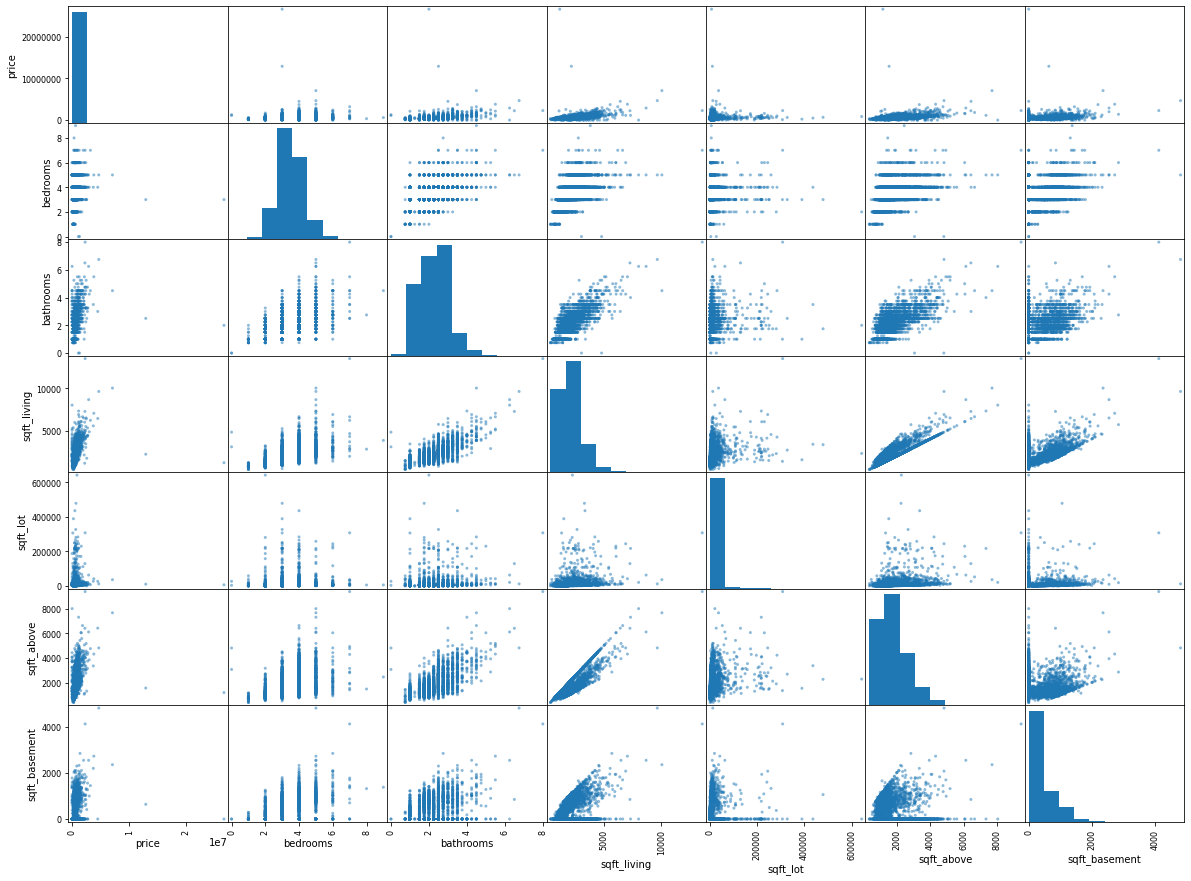

In [13]:
# Scatter matrix
'''
    Considero lo scatter matrix di 'price',
    confrontato con alcune features.
'''

#train_set[0:]
attributes = ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',
              'sqft_above',	'sqft_basement']
pd.plotting.scatter_matrix(train_set[attributes],figsize=(20,15))

'''
    Se noti, troverai degli outliers non indifferenti.

    Potrebbero essere degli errori sistematici o comunque eliminabili...
            ...mble mlbe
'''


In [14]:
# Preprocessing

'''
    Come scritto sopra, ho trovato 41 valori nulli nella colonna di 'price'.
    Quindi?
    Sono pochi, rispetto all'intero DF e pertanto eliminabili.
'''
# Eliminazione delle RIGHE con 'price' = 0
df_red1 = train_set[train_set['price'] != 0]


'''
    Inoltre le colonne seguenti vengono qui rimosse dal momento che 
    (a mio parere) non rappresentano dati interessanti all'analisi:
i)   id ---------> è ovvio;
ii)  data -------> è l'inserimento in due mesi circa dei dati (meno ovvio, anzi...);
iii) street -----> ovvio.
iv)  country ----> è la sola USA
'''
#train_set['city'].unique()
col_to_drop = ['id','date','street','country']
df_red2 = df_red1.drop(col_to_drop, axis=1)


'''
    Raggruppo in base alla città
    ed in base ai prezzi delle case secondo media e occorrenze.
    
    Noterai che la media è pressocché uguale ovunque
    tuttavia si ha una forte disuguaglianza nel numero di occorrenze tra le case,
    dove la città di Seattle rappresenta la stragrande maggioranza
    (ma circa la metà delle occorrenze del totale delle restanti città).
    
    Questo credevo che mi potesse permettere di considerare 'city' come diviso in:
    <<Seattle>> e <<Non-Seattle>> ...
                                    ...invece no. Si ha solo peggioramento.
'''

cities = pd.DataFrame(train_set.groupby(['city'])['price'].agg(['mean', 'count']))
cities.sort_values(by='count', ascending=False)

,mean,count
city,,
Seattle,5.799845e+05,1281
Bellevue,8.678184e+05,230
Renton,3.718776e+05,224
Redmond,6.827283e+05,189
Kirkland,6.672971e+05,155
Issaquah,5.984533e+05,154
Kent,4.783538e+05,148
Auburn,2.967789e+05,141
Sammamish,6.983635e+05,138


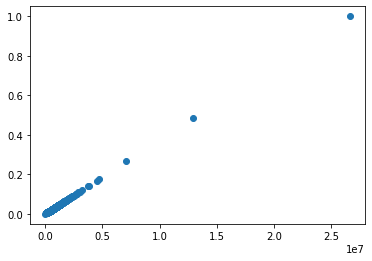

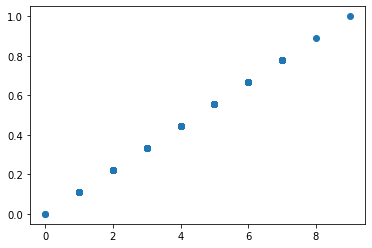

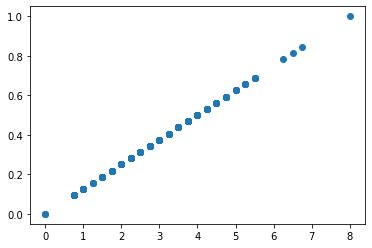

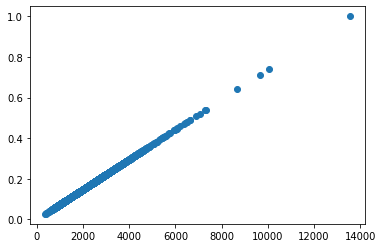

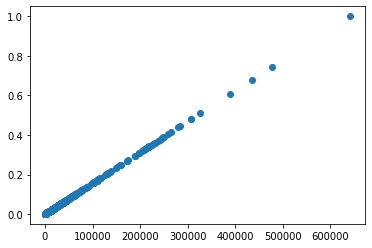

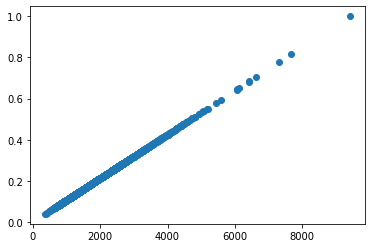

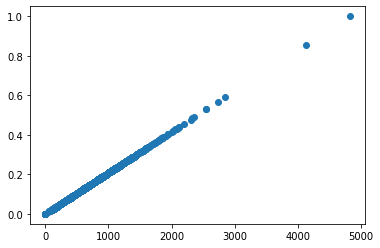

In [15]:
''' 
    Giochiamo un po' sulla magnitudine dei dati
    (fai riferimento alla scatter plot)
'''

df_red2['magnitudine_price'] = df_red2['price']/df_red2['price'].max()
df_red2['magnitudine_bedrooms'] = df_red2['bedrooms']/df_red2['bedrooms'].max()
df_red2['magnitudine_bathrooms'] = df_red2['bathrooms']/df_red2['bathrooms'].max()
df_red2['magnitudine_sqft_living'] = df_red2['sqft_living']/df_red2['sqft_living'].max()
df_red2['magnitudine_sqft_lot'] = df_red2['sqft_lot']/df_red2['sqft_lot'].max()
df_red2['magnitudine_sqft_above'] = df_red2['sqft_above']/df_red2['sqft_above'].max()
df_red2['magnitudine_sqft_basement'] = df_red2['sqft_basement']/df_red2['sqft_basement'].max()


import matplotlib.pyplot as plt

new_attributes_y = ['magnitudine_price','magnitudine_bedrooms',
                    'magnitudine_bathrooms','magnitudine_sqft_living',
                    'magnitudine_sqft_lot','magnitudine_sqft_above',
                    'magnitudine_sqft_basement']

new_attributes_x = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
                    'sqft_above','sqft_basement']

'''
    Si può notare forse un po' più chiaramente il "problema" degli outliers
'''

for indice in range(len(new_attributes_x)):
  plt.scatter(df_red2[new_attributes_x[indice]], df_red2[new_attributes_y[indice]])
  plt.show()

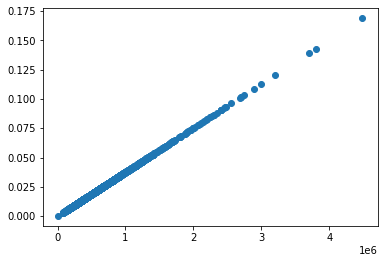

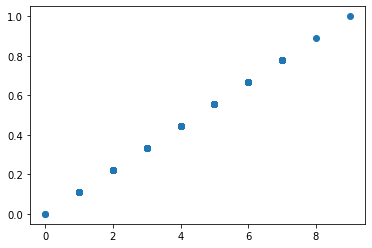

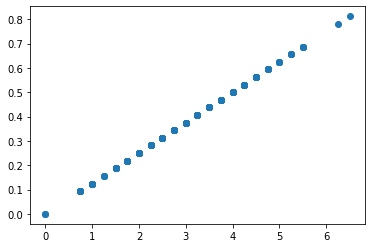

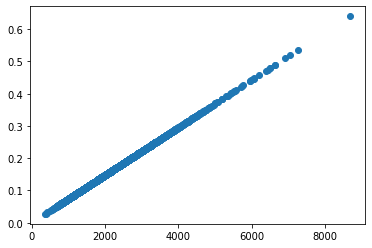

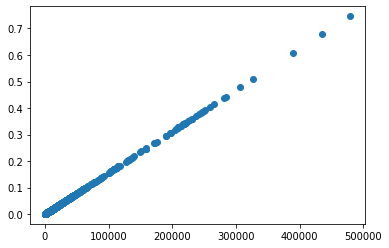

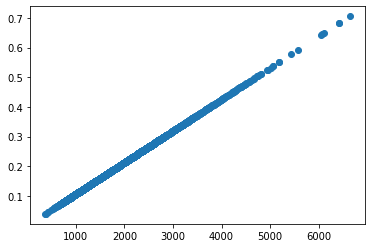

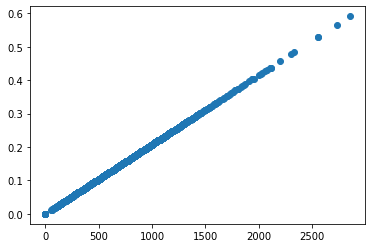

"\ndf_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].min()].index, inplace=True)\ndf_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].max()].index, inplace=True)\ndf_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].max()].index, inplace=True)\n"

In [16]:
'''
    Come anticipato, proseguo eliminando anche gli outliers 
    (forse altrove anche chiamati "spike"),
    ovvero quei dati che superano oltre una certa soglia la magnitudine
'''
# Eliminazione dati non indicativi (spike)

'''
    Ho scelto i valori di soglia forse in modo troppo naive,
    senza una vera e propria analisi più dettagliata.
'''

df_red_cut_spike = df_red2[df_red2['price']/df_red2['price'].max() < 0.4]
df_red_cut_spike = df_red_cut_spike[df_red_cut_spike['bathrooms']/df_red_cut_spike['bathrooms'].max() < 1]
df_red_cut_spike = df_red_cut_spike[df_red_cut_spike['sqft_living']/df_red_cut_spike['sqft_living'].max() < 1]# 0.8]
df_red_cut_spike = df_red_cut_spike[df_red_cut_spike['sqft_lot']/df_red_cut_spike['sqft_lot'].max() < 1]# 0.6]
df_red_cut_spike = df_red_cut_spike[df_red_cut_spike['sqft_above']/df_red_cut_spike['sqft_above'].max() < 1]# 0.7]
df_red_cut_spike = df_red_cut_spike[df_red_cut_spike['sqft_basement']/df_red_cut_spike['sqft_basement'].max() < 1]# 0.8]

'''
    Di seguito i nuovi plot relativi allo scatter matrix.
    Potrebbe essere curioso successivamente, giocare ancora coi valori di soglia,
    per vedere come cambi il risultato del MAPE.
'''

for indice in range(len(new_attributes_x)):
  plt.scatter(df_red_cut_spike[new_attributes_x[indice]], df_red_cut_spike[new_attributes_y[indice]])
  plt.show()

# Provvisorio
'''
attributes2 = ['price',	'bedrooms']#,	'bathrooms',	'sqft_living',	'sqft_lot',
              #'sqft_above',	'sqft_basement']
pd.plotting.scatter_matrix(df_red_cut_spike[attributes2],figsize=(20,15))
'''

'''
    Dove elimino altri outliers nella distribuzione di 'price' vs. 'bedrooms',
    ovvero le code estreme (min & max) nel numero di 'bedrooms'
'''
'''
df_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].min()].index, inplace=True)
df_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].max()].index, inplace=True)
df_red_cut_spike.drop(df_red_cut_spike.loc[df_red_cut_spike['bedrooms']==df_red_cut_spike['bedrooms'].max()].index, inplace=True)
'''

3632


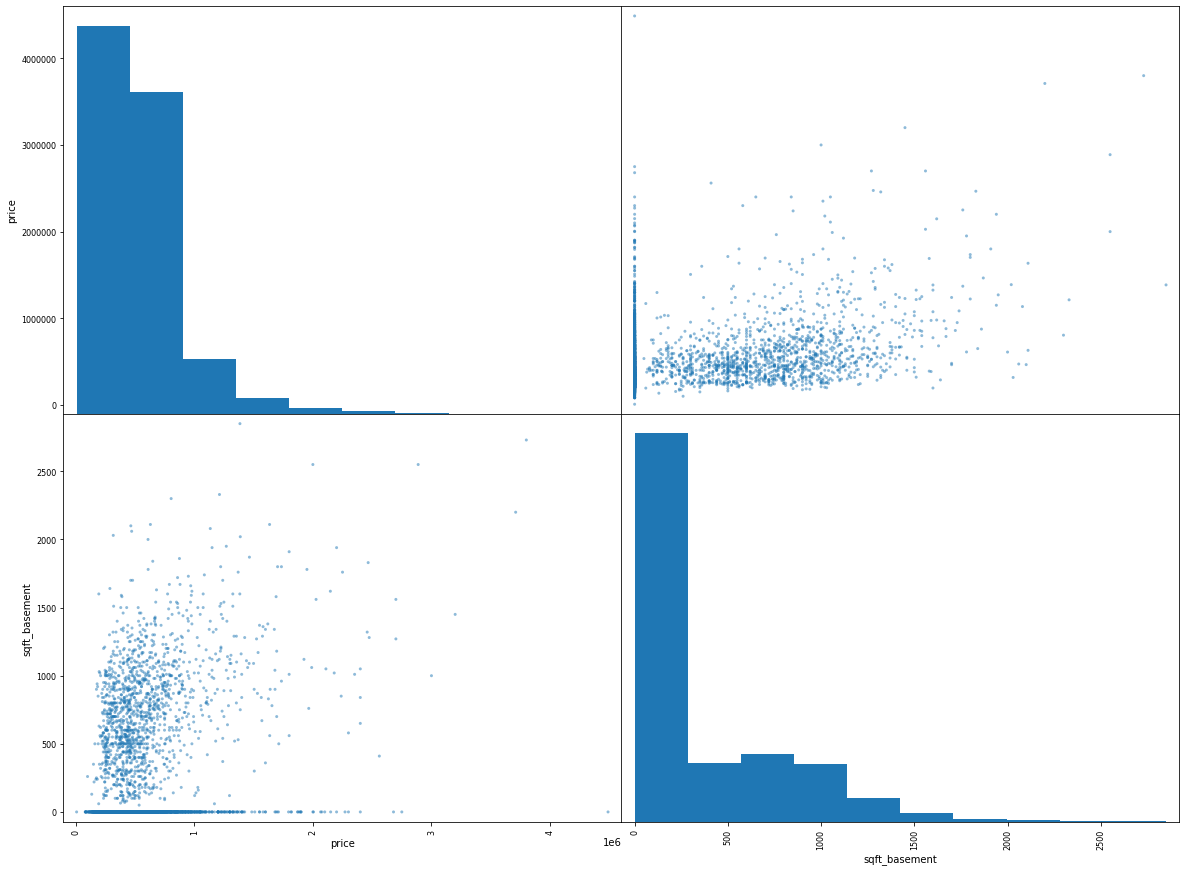

In [17]:
'''
    Si nota che sqft_basement ha molti (3632) valori nulli... 
    ...creerò appositamente una colonna features a parte.
'''

attributes2 = ['price',	'sqft_basement']
pd.plotting.scatter_matrix(df_red_cut_spike[attributes2],figsize=(20,15))

print((df_red_cut_spike.sqft_basement==0).count())

Dimensione del <<train_set>> senza spikes:  3632
Dimensione del <<train_set>>:  3680
Differenza <<len(train_set)-len(df_red_cut_spike)>>:  48



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7895e470>,
      dtype=object)

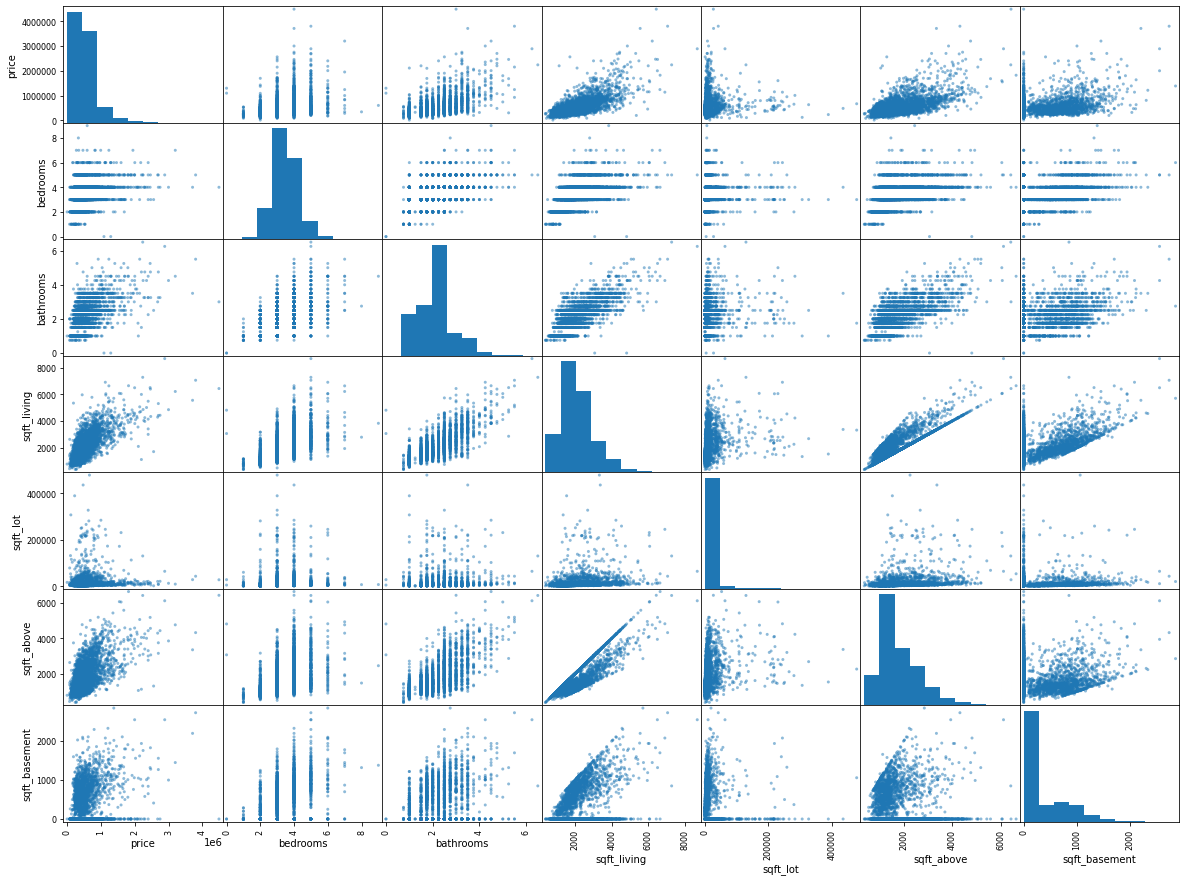

In [18]:
'''
    Riassumendo ho:
    i)   cancellato i dati con 'price' = 0;
    ii)  cancellate le colonne considerate non proficue;
    iii) cancellate le righe con dati troppo distanti dalla moda

    Nota inoltre che:
    a)   la differena tra le lunghezze del train_test originarion con 'df_red_cut_spike',
         è solamente di 70
''' 

print("Dimensione del <<train_set>> senza spikes: ", len(df_red_cut_spike))
print("Dimensione del <<train_set>>: ", len(train_set))
print("Differenza <<len(train_set)-len(df_red_cut_spike)>>: ", len(train_set)-len(df_red_cut_spike))
print()

ausilio = df_red_cut_spike.corr()
ausilio['price'].sort_values(ascending=False)

attributes = ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',
              'sqft_above',	'sqft_basement']
pd.plotting.scatter_matrix(df_red_cut_spike[attributes],figsize=(20,15))




In [22]:
'''
    Proseguo trattando ancora i dati,
    in particolare:
    a) elimino le colonne relative alla magnitudine;
    b) pratico un LabelEncoder() per 'city';
    c) eseguo un LabelEncoder() su 'statezip'.
'''
#print(data.info())
# Inizio punto ( a )
data = df_red_cut_spike.drop(df_red_cut_spike.columns[15:22], axis=1)

# Inizio punto ( b )
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(list(data.city.values))
data.city = enc.transform(list(data.city.values))

# Inizio punto ( c )
enc = LabelEncoder()
enc.fit(list(data.statezip.values))
data.statezip = enc.transform(list(data.statezip.values))

#data['eng_sqftBasement'] = np.where(data['sqft_basement'] > 0, 1, 0)


In [23]:
print(data)

         price  bedrooms  bathrooms  ...  yr_renovated  city  statezip
0     700000.0       3.0       2.75  ...          1985    34        70
1     225000.0       3.0       2.00  ...             0     1         0
2     754950.0       3.0       2.50  ...             0    19        21
3     411000.0       4.0       2.00  ...          2000     1         0
4     215000.0       3.0       1.00  ...             0    18        20
...        ...       ...        ...  ...           ...   ...       ...
3675  535000.0       3.0       1.00  ...          2002    34        74
3676  375000.0       4.0       1.75  ...             0    34        57
3677  427874.0       3.0       3.00  ...          1923    26        27
3678  665000.0       2.0       1.00  ...          2002    34        58
3679  309000.0       3.0       2.25  ...             0    34        49

[3632 rows x 15 columns]


In [35]:
'''
    Passo a suddividere il DF di training (che al momento sto chiamando 'data')
    in un ulteriore 'training' e 'validation' set.

    Come vedi elimino provvisoriamiente 'price' nella X,
    che invece considero unicamente in y.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1),
                                                    data.price, test_size = 0.2,
                                                    random_state = 42)


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Normalization
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)


# StandardScaler
X_train_sclr = X_train.copy()
X_test_sclr = X_test.copy()
num_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement']
for i in num_cols:
    scaler = StandardScaler().fit(X_train_sclr[[i]])
    X_train_sclr[i] = scaler.transform(X_train_sclr[[i]])
    X_test_sclr[i] = scaler.transform(X_test_sclr[[i]])


In [25]:
# Funzione MAPE (Lucia/Elisabetta) necessaria per i modelli.
# y_true = sono i valori di test.

def mape(y_true, y_pred):
  return (np.abs((y_true - y_pred)/(y_true+1))).mean()

In [33]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

In [34]:
'''
    Sperando che non faccia overfitting,
    il modello migliore sembra essere GBR con n_estimators:2490...
    ...Mah
'''
tic()
from sklearn.ensemble import GradientBoostingRegressor


params_final = {'n_estimators': 2490,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
            
final_model_reg = GradientBoostingRegressor(**params_final)
final_model_reg.fit(X_train_norm, y_train)

risultato_finale = mape(y_test, final_model_reg.predict(X_test_norm))
print("Risultato finale: ", risultato_finale)

toc()


Risultato finale:  0.22070714211107897
Elapsed time is 16.463224172592163 seconds.


In [36]:
'''
    Procedo ora considerando il DF test_set, che andrò qui modificando
    così da poterlo riutilizzare per la sfida.

    Ricorda che lo avevi già caricato proprio nella prima cella

    Considero il test_set sottratto delle colonne non utili
    e normalizzato nelle sue features.
'''

col_to_drop = ['id','date','street','country']
test_set_dropped = test_set.drop(col_to_drop, axis = 1)


enc = LabelEncoder()
enc.fit(list(test_set_dropped.city.values))
test_set_dropped.city = enc.transform(list(test_set_dropped.city.values))

enc = LabelEncoder()
enc.fit(list(test_set_dropped.statezip.values))
test_set_dropped.statezip = enc.transform(list(test_set_dropped.statezip.values))


norm = MinMaxScaler().fit(data.drop('price', axis=1))
X_final_test_norm = norm.transform(test_set_dropped)

test_predictions = final_model_reg.predict(X_final_test_norm)

In [37]:
#print(test_predictions)

In [31]:
final_df = pd.DataFrame(test_predictions) 
  
# Using DataFrame.insert() to add a column 
final_df.insert(0, "ID", test_set.id, True)
final_df = final_df.rename(columns={0: 'price'})

final_df.to_csv('PricePredictions_FrancescoSilvia.csv',index=False)

In [32]:
print(final_df)


       ID         price
0     858  6.972978e+05
1    1874  1.237491e+06
2     918  4.145120e+05
3     475  4.866364e+05
4    2466  5.213759e+05
..    ...           ...
915  3204  4.079332e+05
916   130  7.267153e+05
917  2494  3.268211e+05
918   358  5.898413e+05
919  1161  3.382482e+05

[920 rows x 2 columns]
